# Python Notebook training NPI on political views

This notebook is also a good example on how to use the NPI project to train your own NPI

## Setup

Before starting, you would want to change the `base_path` variable. 
It should be the absolute path pointing to the towards-neural-programming-interfaces repository.

Also, each step in training an NPI is conditioned on the variable toggles, so you can disable certain steps to not redo them again when running the whole notebook.

In [12]:
# For dev purposes, enable autoreload of modules
%load_ext autoreload

In [1]:
import os
from argparse import Namespace

import pandas as pd
import torch

%autoreload

# Constructing training dataset
from npi.dataset.construct_politics_data import construct_politics_data

# Training classifier
from npi.training.train_classifier import train_classifier

# Testing classifier
from npi.training.test_classifier import test_classifier

# Training NPI
from npi.training.train_npi import train_adversarial_NPI

UsageError: Line magic function `%autoreload` not found.


In [17]:
# Path variables to customize
base_path = "/home/cs401r/towards-neural-programming-interfaces/"
classifier_path = "classifiers/layers_5_11/"
npi_path = "npi_models/"
data_path = base_path + "data/processed/politics/sentence_arrays"
liberal_path = base_path + "data/processed/politics/liberal/sentence_arrays"
conservative_path = base_path + "data/processed/politics/conservative/sentence_arrays"

In [7]:
# Toggle steps
construct = False
train_class = True
test_class = True
train_npi = True
test_npi = True


## Create Dataset

### Get Data from NewB GitHub repo

See `construct_politics_data` to see how to construct data.

In [5]:
if construct:
    model_layers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
    with open("NewB/train_orig.txt", 'r', newline='') as f:
            data = pd.read_csv(f, delimiter="\t")
            data["view"] = data["view"].replace(
                to_replace={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})
            data = data[data.view != 5]
            data = data.sample(frac=1)
            construct_politics_data(model_layers, data, 1, "data/politics/sentence_arrays.pkl")

## Train classifier from Dataset



In [7]:
if not os.path.exists(classifier_path):
        os.mkdir(classifier_path)
if train_class:
    args = Namespace(
        save_file_path=classifier_path,
        continue_epoch=100, # You can choose to continue training from an epoch
        train_file_path_base=base_path+"data/processed/politics/sentence_arrays",
        num_epochs=70,
        batch_size=5,
        test_freq=5,
        save_freq=5,
        num_pkls=35,
        device=torch.device("cuda:1"),
        pred_inds=[5,11],
        class_lr=1e-5
    )
    classifier = train_classifier(args)

Loading Data from /home/cs401r/towards-neural-programming-interfaces/data/processed/politics/sentence_arrays.pkl_0
Creating Classifier Model
Classifier INIT
Defining classifier model
Initializing class loss
Training


SAVING AFTER EPOCH ITERATIONS
Epoch train loss history ==  [69316069.40790273, 69307794.39270517, 69301987.27781156, 69294086.19574468, 69296749.37386018, 69301251.62310031, 69306813.76291794, 69309258.05714285, 69311981.63161094, 69318422.41945289, 69295155.56960486, 69316686.47781155, 69316593.8869301, 69309779.84680851, 69325316.7756839, 69307370.03768997, 69325595.94407295, 69308618.79635258, 69299600.67598784, 69309281.90151976, 69306704.86079027, 69301859.40911855, 69293038.86200608, 69307072.75866261, 69300823.8006079, 69306708.35258359, 69301463.09057751, 69324357.3787234, 69300542.53617021, 69313220.5568389, 69303790.64316109, 69315088.45714286, 69324230.83282675, 69299087.4212766, 69309556.82431611, 69323325.4905775, 69296362.56291793, 69296584.88024317, 69290361.23039514, 69315691.52097264, 69324128.94346504, 69301967.23647417, 69312027.70577508, 69308887.65957446, 69290937.00182371, 69315891.34589666, 69312976.12158054, 69308257.90638298, 69303879.76170212, 69305752.7732522

### Test Classifier


In [14]:
if test_class:
    args = Namespace(
        model_dir_path=classifier_path,
        data_path=data_path,
        test_pkls="35,36,37,38,39",
        test_epochs="100,170",
        perturbation_indices="5,11"
    )
    test_classifier(args)

NEW FILE classifiers/layers_5_11/ epoch num 100
Creating Classifier Model
Classifier INIT
Defining classifier model
-server-server-server-server-server
truth 0.0
yhat 0.4929727613925934
 car.\n\n"I'm not sure if
truth 1.0
yhat 0.4929727613925934
\n\nThe United States has been accused of using
truth 0.0
yhat 0.4929727613925934
ACCURACY FOR TEST 35: 0.5407166123778502
, said the team is "very excited" about
truth 0.0
yhat 0.4929727613925934
 I noticed was that the first thing I noticed was
truth 0.0
yhat 0.4929727613925934
 going to be able to do that.\n\n
truth 1.0
yhat 0.4929727613925934
ACCURACY FOR TEST 36: 0.48534201954397393
"I think it's a good thing that we
truth 1.0
yhat 0.4929727613925934
 good thing that we're not doing this.\n
truth 1.0
yhat 0.4929727613925934
 to do that.\n\n"I think it
truth 0.0
yhat 0.4929727613925934
ACCURACY FOR TEST 37: 0.44625407166123776
 number of people who have been killed in the conflict
truth 0.0
yhat 0.4929727613925934
 targeted.\n\n"We're not g

## Training NPI

############################################################
<<<        USING THE FOLLOWING INPUT ARGUMENTS!!!        >>>
Namespace(batch_size=5, content_classifier_path='classifiers/layers_5_11/Classifier_classification_network_epoch170.bin', content_classifier_type='pretrained', device=device(type='cuda'), disc_lr=0.0001, discrim_coeff=3.0, generation_classifier_type='adversarial', gpu_num=0, head_start_num=5, language_model_type='gpt2', max_seq_len=10, n_gpu=2, npi_lr=1e-06, npi_type='adversarial', num_epochs=20, num_pkls=35, num_seq_iters=10, perturbation_indices=[5, 11], save_file_path='npi_models/conservative/params_discco3.0_styco10.0_simco1.0_layers_5_11/', save_freq=5, similarity_coeff=1.0, style_coeff=10.0, test_freq=5, train_file_path='/home/cs401r/towards-neural-programming-interfaces/data/processed/politics/conservative/sentence_arrays')
############################################################
############################################################
<<<  NOTE :  ON

Initializing npi loss func
Initializing classifier losses
Setting Content Classifier and GPT-2 Parameters to requires_grad=False
Training
############ Epoch ==  0  ############


end of regular epoch
############ Epoch ==  1  ############


end of regular epoch
############ Epoch ==  2  ############


end of regular epoch
############ Epoch ==  3  ############


end of regular epoch
############ Epoch ==  4  ############


end of regular epoch
############ Epoch ==  5  ############


epoch:5, gen_class_loss:6854.53, npi_loss:100180.15, time_elapsed:5746.7: 100%|██████████| 35/35 [19:07<00:00, 32.68s/it] 

end of regular epoch
Saving NPI Model
Saving NPI Loss Summary
Saving GenerationClassifier Model
Saving GenerationClassifier Loss Summary
Done saving for current epoch
Saving Data Visualizations: START
obtaining NPI visualizations
obtaining ContentClassifier visualizations


obtaining GenerationClassifier visualizations
Saving Data Visualizations: STOP
############ Epoch ==  6  ############


end of regular epoch
############ Epoch ==  7  ############


end of regular epoch
############ Epoch ==  8  ############


end of regular epoch
############ Epoch ==  9  ############


end of regular epoch
############ Epoch ==  10  ############


epoch:10, gen_class_loss:29925.36, npi_loss:167594.17, time_elapsed:10579.6: 100%|██████████| 35/35 [19:06<00:00, 32.72s/it]

end of regular epoch
Saving NPI Model
Saving NPI Loss Summary
Saving GenerationClassifier Model
Saving GenerationClassifier Loss Summary
Done saving for current epoch
Saving Data Visualizations: START
obtaining NPI visualizations
obtaining ContentClassifier visualizations


obtaining GenerationClassifier visualizations
Saving Data Visualizations: STOP
############ Epoch ==  11  ############


end of regular epoch
############ Epoch ==  12  ############


end of regular epoch
############ Epoch ==  13  ############


end of regular epoch
############ Epoch ==  14  ############


end of regular epoch
############ Epoch ==  15  ############


epoch:15, gen_class_loss:37750.37, npi_loss:191969.88, time_elapsed:15404.1: 100%|██████████| 35/35 [19:04<00:00, 32.76s/it]

end of regular epoch
Saving NPI Model
Saving NPI Loss Summary
Saving GenerationClassifier Model
Saving GenerationClassifier Loss Summary
Done saving for current epoch
Saving Data Visualizations: START
obtaining NPI visualizations
obtaining ContentClassifier visualizations


obtaining GenerationClassifier visualizations
Saving Data Visualizations: STOP
############ Epoch ==  16  ############


end of regular epoch
############ Epoch ==  17  ############


end of regular epoch
############ Epoch ==  18  ############


end of regular epoch
############ Epoch ==  19  ############


end of regular epoch
SAVING META-DATA AFTER FULL TRAINING - NPI AND CLASSIFIER RETURNED (TO MAIN), NOT SAVED
Saving GenerationClassifier Loss Summary
Saving Data Visualizations: START
Saving Data Visualizations: STOP
Epoch loss history ==  [98958.89195478724, 96778.94464760639, 99453.63763297872, 98851.25282579787, 96638.41173537234, 100234.22988696808, 97261.12300531915, 96901.08311170213, 98272.35605053192, 96929.56914893616, 98462.44498005319, 99224.52642952128, 97159.27376994681, 97110.08061835106, 99315.2144281915, 97418.96309840426, 97673.2189162234, 97285.8748337766, 96905.76230053192, 97574.76695478724, 97743.66156914894, 97576.5857712766, 96035.85056515958, 98986.15841090426, 98161.6407912234, 95893.125, 96388.95994015958, 97289.35621675532, 98571.81117021276, 97916.5355718085, 97891.36220079787, 97938.28075132979, 97693.60089760639, 97007.7538231383, 96020.55801196808, 98954.00315824468, 96929.77476728724, 99735.3243018617, 99123.71276595745, 96750.51512632979, 100418.9266954

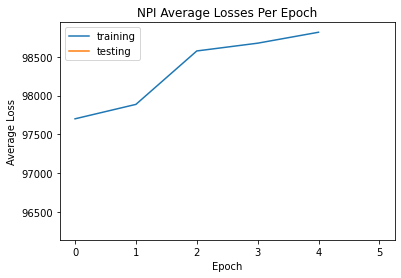

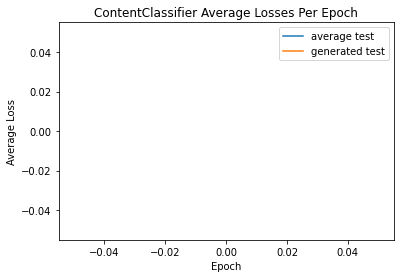

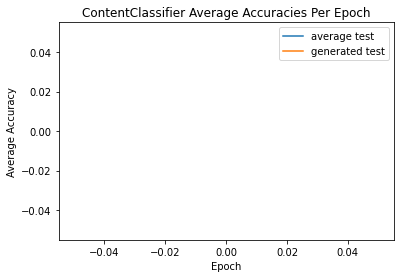

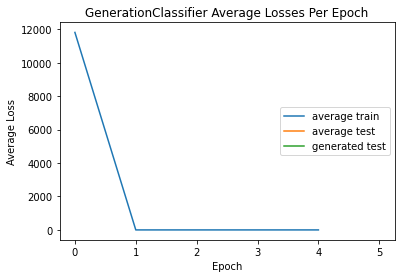

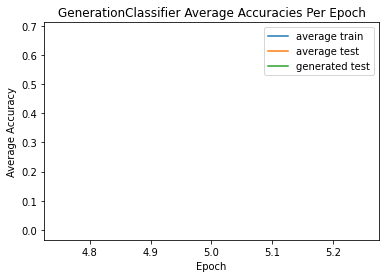

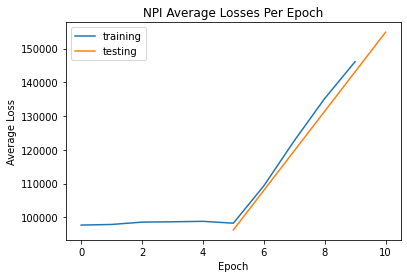

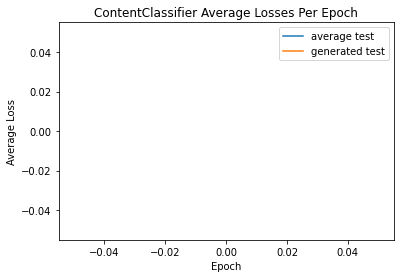

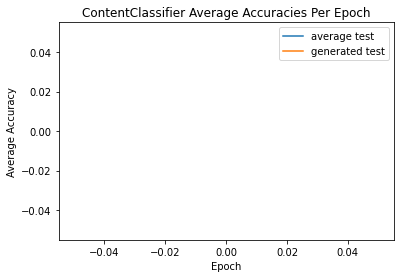

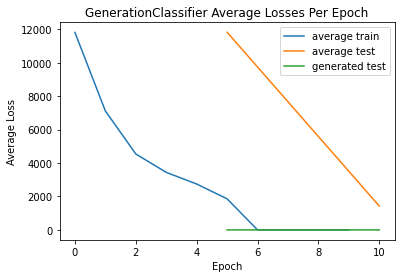

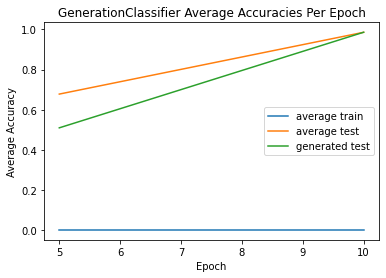

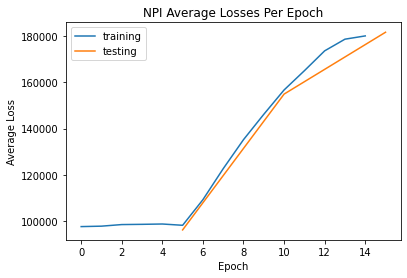

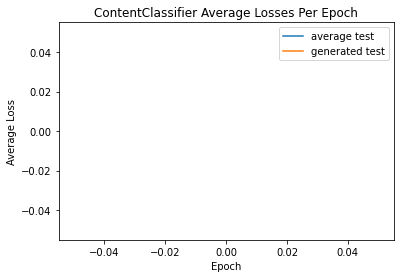

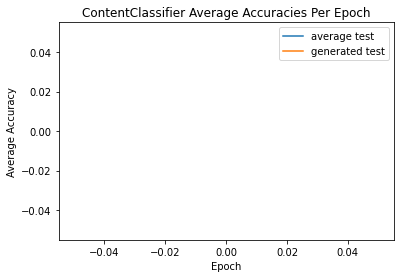

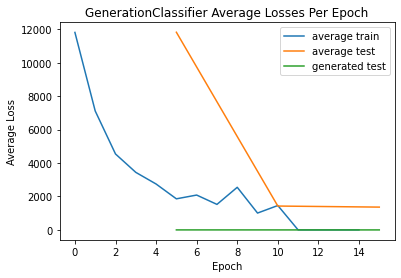

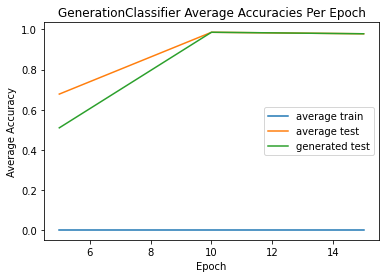

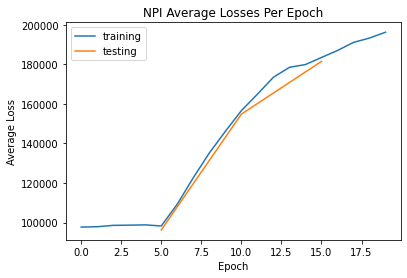

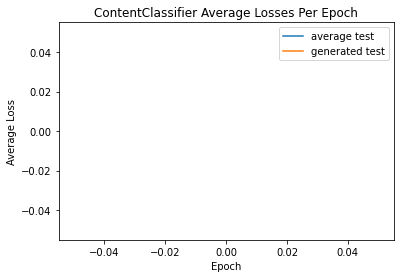

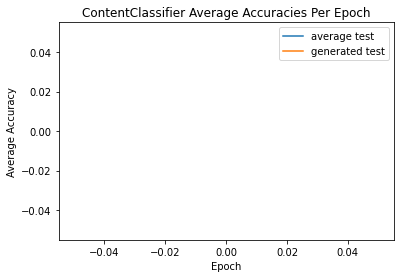

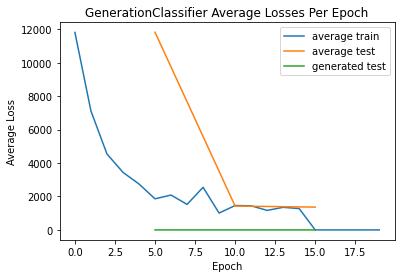

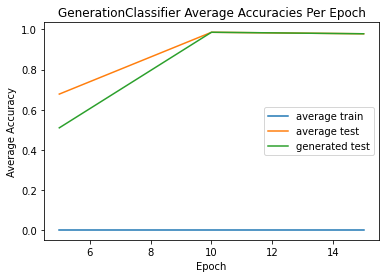

In [21]:
args = Namespace(
        save_file_path=npi_path + "conservative",
        train_file_path=conservative_path,
        content_classifier_path=classifier_path+"Classifier_classification_network_epoch170.bin",
        language_model_type="gpt2",
        npi_type="adversarial",
        content_classifier_type="pretrained",
        generation_classifier_type="adversarial",
        num_epochs=20,
        batch_size=5,
        test_freq=5,
        save_freq=5,
        num_pkls=35,
        device=torch.device("cuda"),
        n_gpu = torch.cuda.device_count(),
        gpu_num=0,
        discrim_coeff=3.0,  #gamma
        style_coeff=10.0,    #alpha
        similarity_coeff=1.0, #beta
        head_start_num=5,
        perturbation_indices=[5,11],
        max_seq_len=10,
        num_seq_iters=10,
        npi_lr=1e-6,
        disc_lr=1e-4,
    )
args.save_file_path=F"{npi_path}conservative/params_discco{args.discrim_coeff}_styco{args.style_coeff}_simco{args.similarity_coeff}_layers_5_11/"

if not os.path.exists(args.save_file_path):
    os.mkdir(args.save_file_path)

npi_model, content_classifier_model, generation_classifier_model, avg_epoch_loss = train_adversarial_NPI(args)

In [22]:
if train_npi:
    args = Namespace(
        save_file_path=npi_path + "liberal",
        train_file_path=liberal_path,
        content_classifier_path=classifier_path+"Classifier_classification_network_epoch150.bin",
        language_model_type="gpt2",
        npi_type="adversarial",
        content_classifier_type="pretrained",
        generation_classifier_type="adversarial",
        num_epochs=20,
        batch_size=5,
        test_freq=5,
        save_freq=5,
        num_pkls=35,
        device=torch.device("cuda"),
        n_gpu = torch.cuda.device_count(),
        gpu_num=0,
        discrim_coeff=3.0,  #gamma
        style_coeff=10.0,    #alpha
        similarity_coeff=1.0, #beta
        head_start_num=5,
        perturbation_indices=[5,11],
        max_seq_len=10,
        num_seq_iters=10,
        npi_lr=1e-6,
        disc_lr=1e-4,
    )
    args.save_file_path=F"{npi_path}/params_discco{args.discrim_coeff}_styco{args.style_coeff}_simco{args.similarity_coeff}_layers_5_11/"

    if not os.path.exists(args.save_file_path):
        os.mkdir(args.save_file_path)
    
    npi_model, content_classifier_model, generation_classifier_model, avg_epoch_loss = train_adversarial_NPI(args)

############################################################
<<<        USING THE FOLLOWING INPUT ARGUMENTS!!!        >>>
Namespace(batch_size=5, content_classifier_path='classifiers/layers_5_11/Classifier_classification_network_epoch150.bin', content_classifier_type='pretrained', device=device(type='cuda'), disc_lr=0.0001, discrim_coeff=3.0, generation_classifier_type='adversarial', gpu_num=0, head_start_num=5, language_model_type='gpt2', max_seq_len=10, n_gpu=2, npi_lr=1e-06, npi_type='adversarial', num_epochs=20, num_pkls=35, num_seq_iters=10, perturbation_indices=[5, 11], save_file_path='npi_models//params_discco3.0_styco10.0_simco1.0_layers_5_11/', save_freq=5, similarity_coeff=1.0, style_coeff=10.0, test_freq=5, train_file_path='/home/cs401r/towards-neural-programming-interfaces/data/processed/politics/liberal/sentence_arrays')
############################################################
############################################################
<<<  NOTE :  ONLY FIRST 35 FILES

end of regular epoch
############ Epoch ==  1  ############


epoch:1, gen_class_loss:N/A, npi_loss:94637.67, time_elapsed:1648.3:  77%|███████▋  | 27/35 [12:03<03:29, 26.22s/it] 